In [17]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def one_hot_encode(y):
  len = np.size(y)
  encoded_y = np.zeros((len,7))
  for i in range(len):
    if y[i] == 1:
      encoded_y[i,0] = 1
    if y[i] == 2:
      encoded_y[i,1] = 1
    if y[i] == 3:
      encoded_y[i,2] = 1
    if y[i] == 4:
      encoded_y[i,3] = 1
    if y[i] == 5:
      encoded_y[i,4] = 1
    if y[i] == 6:
      encoded_y[i,5] = 1
    if y[i] == 7:
      encoded_y[i,6] = 1
  return encoded_y

def decode(y):
  len = np.shape(y)[0]
  class_labels = np.zeros(len)
  for i in range(len):
    class_labels[i] = np.argmax(y[i])+1
  return class_labels

def my_model():
  model = models.Sequential()

  model.add(layers.Conv1D(filters=20, kernel_size=7, activation='relu', input_shape=(800,12)))
  model.add(layers.MaxPooling1D(pool_size=3, strides=3))
  model.add(layers.Conv1D(filters=60, kernel_size=7, activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=3, strides=3))
  model.add(layers.Dropout(0.7))
  model.add(layers.Conv1D(filters=120, kernel_size=7))
  model.add(layers.Conv1D(filters=120, kernel_size=7))
  model.add(layers.Flatten())
  model.add(layers.Dense(2000, activation='relu'))
  model.add(layers.Dense(700))
  model.add(layers.Dense(50))
  model.add(layers.Dense(7, activation='sigmoid'))

  return model

In [2]:
file = scipy.io.loadmat('/content/drive/MyDrive/NNFL Assignments (Aug 2021)/Assignment 2/input.mat')
file_out = scipy.io.loadmat('/content/drive/MyDrive/NNFL Assignments (Aug 2021)/Assignment 2/class_label.mat')

In [3]:
file['x'].shape

(1, 17160)

In [4]:
file['x'][0,0].shape

(12, 800)

In [5]:
instances = file['x'][0,:]

In [6]:
instances[0].T.shape

(800, 12)

In [7]:
data = np.zeros((17160,800,12))
for i in range(17160):
  data[i] = instances[i].T

In [8]:
data.shape

(17160, 800, 12)

In [9]:
encoded_y = one_hot_encode(file_out['y'])

In [10]:
encoded_y.shape

(17160, 7)

In [11]:
np.random.seed(0)
np.random.shuffle(data)
np.random.seed(0)
np.random.shuffle(encoded_y)

x_train, x_test, y_train, y_test = train_test_split(data, encoded_y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=1)

In [15]:
# model training
model = my_model()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00004)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=1024)

Epoch 1/15
12/12 [==============================] - 68s 6s/step - loss: 1.3443 - accuracy: 0.5387 - val_loss: 0.2144 - val_accuracy: 0.9295
Epoch 2/15
12/12 [==============================] - 66s 6s/step - loss: 0.1330 - accuracy: 0.9550 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3/15
12/12 [==============================] - 67s 6s/step - loss: 0.0143 - accuracy: 0.9964 - val_loss: 2.6112e-04 - val_accuracy: 1.0000
Epoch 4/15
12/12 [==============================] - 66s 6s/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 8.7353e-05 - val_accuracy: 1.0000
Epoch 5/15
12/12 [==============================] - 66s 5s/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 3.5949e-05 - val_accuracy: 1.0000
Epoch 6/15
12/12 [==============================] - 66s 6s/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 1.8927e-05 - val_accuracy: 1.0000
Epoch 7/15
12/12 [==============================] - 65s 5s/step - loss: 8.5524e-04 - accuracy: 0.9998 - val_loss: 6.4243e-06 - val_accuracy: 1.0

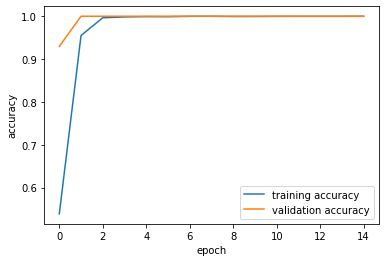

In [18]:
# training and validation accuracy plots
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

In [13]:
# model prediction
pred = model.predict(x_test)

In [14]:
# confusion matrix
cm = confusion_matrix(decode(y_test), decode(pred))
print(cm)

[[580   0   0   0   0   0   0]
 [  0 352   0   0   0   0   0]
 [  0   0 621   0   0   0   0]
 [  0   0   0 328   0   0   0]
 [  0   0   0   0 582   0   0]
 [  0   0   0   0   0 606   0]
 [  0   0   0   0   0   0 363]]


In [19]:
type(cm)

numpy.ndarray

In [24]:
# performance measures (calculated directly from confusion matrix)
ind_accuracy = np.zeros(7)
for i in range(7):
  ind_accuracy[i] = cm[i,i]/np.sum(cm[i,:])

overall_accuracy = np.sum(cm.diagonal()) / np.sum(cm)
for i in range(7):
  print("Accuracy of class "+str(i+1)+" = "+str(ind_accuracy[i]))

print("Overall Accuracy = {}".format(overall_accuracy))

Accuracy of class 1 = 1.0
Accuracy of class 2 = 1.0
Accuracy of class 3 = 1.0
Accuracy of class 4 = 1.0
Accuracy of class 5 = 1.0
Accuracy of class 6 = 1.0
Accuracy of class 7 = 1.0
Overall Accuracy = 1.0
